#### 感知机学习算法的原始形式
算法2.1（随机梯度下降法）  
输入：训练数据集$T=\left[(x_1,y_1),\ldots,(x_N,y_N)\right)$，学习率$\eta$  
1. 选取初值$w_0,b_0$，确定了假设空间中的一个备选模型
2. 在训练集中选取数据$(x_i,y_i)$  
3. 如果$y_i(w \cdot x_i +b) \leqslant 0$ $$\begin{aligned} w &:= w+\eta y_{i} x_{i} \\ b &:= b+\eta y_{i} \end{aligned}$$
4. 转至2，直到训练集中没有误分类的点  

输出：$w,b$  
**说明：** $\eta$如果小，这条更新的直线向误分类点移动程度小，如果大的话，移动程度大。

[1. 1.]
-3
[[ 3.]
 [-3.]]


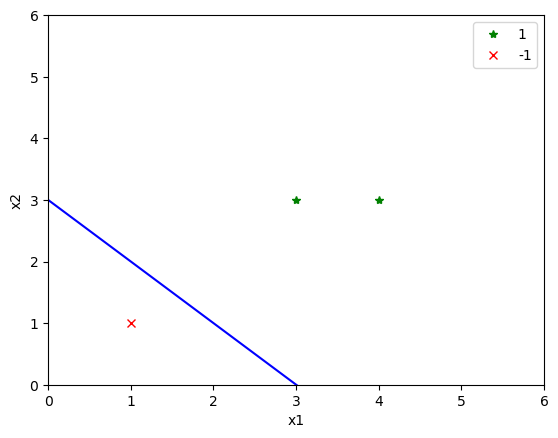

In [2]:
import numpy as np
import matplotlib.pyplot as plt


class MyPerceptron:
    def __init__(self):
        self.w = None
        self.b = 0
        self.l_rate = 1

    def fit(self, X_train, y_train):
        # 用样本点的特征数更新初始w，如x1=(3,3)T，有两个特征，则self.w=[0,0]
        self.w = np.zeros(X_train.shape[1])
        i = 0
        while i < X_train.shape[0]:
            X = X_train[i]
            y = y_train[i]
            # 如果y*(wx+b)≤0 说明是误判点，更新w,b
            if y * (np.dot(self.w, X) + self.b) <= 0:
                self.w = self.w + self.l_rate * np.dot(y, X)
                self.b = self.b + self.l_rate * y
                i = 0  # 如果是误判点,从头进行检测
            else:
                i += 1


def draw(X, w, b):
    # 产生分离超平面上的两点
    X_new = np.array([[0], [6]])
#     原视频错误处已更新
    y_predict = -(b + w[0] * X_new) / w[1] #w0x+w1y+b=0 则y=-b/w1-w0*x/w1
    print(y_predict)
    # 绘制训练数据集的散点图
    plt.plot(X[:2, 0], X[:2, 1], "g*", label="1")
#     原视频错误处理更新
    plt.plot(X[2:, 0], X[2:, 1], "rx", label="-1")
    # 绘制分离超平面
    plt.plot(X_new, y_predict, "b-")
    # 设置两坐标轴起止值
    plt.axis([0, 6, 0, 6])
    # 设置坐标轴标签
    plt.xlabel('x1')
    plt.ylabel('x2')
    # 显示图例
    plt.legend()
    # 显示图像
    plt.show()


def main():
    # 构造训练数据集
    X_train = np.array([[3, 3], [4, 3], [1, 1]])
    y_train = np.array([1, 1, -1])
    # 构建感知机对象，对数据集继续训练
    perceptron = MyPerceptron()
    perceptron.fit(X_train, y_train)
    print(perceptron.w)
    print(perceptron.b)
    # 结果图像绘制
    draw(X_train, perceptron.w, perceptron.b)


if __name__ == "__main__":
    main()